# Group 55 - Assignment 3 - Final Report

<div class="alert alert-block alert-info">
<b>Note:</b>This notebook serves as our report. Suitable comments and explanations with visualizations were prodcued where and when needed.
</div>

***

## Problem 1


### CNN for Image Classification

In [1]:
#Importing the appropriate libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten
from keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore') 

#Setting the random seeds to control the randomness each time the model is run

from numpy.random import seed
seed(1)
tf.random.set_seed(2)

### CIFAR10 Dataset

**Background:**
>CIFAR stands for **Canadian Institute For Advanced Research** and 10 denotes the **number of classes** present in the dataset.
><br>
>Dataset consists of 60,000 32x32 colour images belonging to 10 classes, with 6,000 images per class.<br>
>- This is a widely used dataset for computer vision.
>- The dataset downloaded will have 50,000 training images and 10,000 test images.
>- The test set contains exactly 1000 images per class.
>- It is given that the classes are completely mutually exclusive and there is no overlap.

<div class="alert alert-block alert-info">
<b> Classes </b>  {0: 'airplane',     1: 'automobile',    2: 'bird',    3: 'cat',    4: 'deer',    5: 'dog',
6: 'frog',    7: 'horse',    8: 'ship',    9: 'truck'}
</div>

*Dataset source:* https://www.cs.toronto.edu/~kriz/cifar.html

#### Data loading

In [2]:
(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 929s 5us/step


#### Data Preprocessing & Exploration

In [3]:
#Normalizing the images in the dataset

x_train=x_train/255.0
x_val=x_val/255.0

In [4]:
np.unique(y_train) #checking for the unique classes labels in the target

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

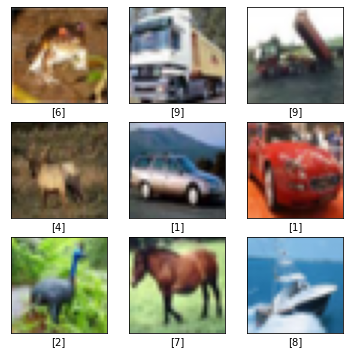

In [5]:
#Checking few images present in the dataset

pyplot.figure(figsize=(6,6))
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.imshow(x_train[i],cmap=pyplot.cm.binary)
    pyplot.xlabel(y_train[i])
pyplot.show();

#### Data split

***20% of the whole training data is considered to be the new training dataset and test data is considered to be validation data as mentioned in the assignment pdf.***

In [6]:
#Sampling 20% of the training set randmoly, using that as your new training set.

train_new_x, rest_x, train_new_y, rest_y = train_test_split(x_train, y_train, test_size=0.8, random_state=275)

In [7]:
train_new_x.shape, train_new_y.shape #checking the shape of the new traning datset

((10000, 32, 32, 3), (10000, 1))

In [8]:
#checking the shape of the new traning and validation datsets
train_new_x.shape, train_new_y.shape,x_val.shape,y_val.shape  

((10000, 32, 32, 3), (10000, 1), (10000, 32, 32, 3), (10000, 1))

### 1 - MLP Implementation

We have built a multi-layer perceptron with the following layers:

* Fully connected layer with 512 units and a sigmoid activation function
* Fully connected layer with 512 units and a sigmoid activation function
* Output layer with "Softmax" activation function and 10 neurons (since we have 10 different classes in our dataset)

*Source: Assignment Question*

In [9]:
model1 = Sequential()
model1.add(Flatten(input_shape = train_new_x.shape[1:]))
model1.add(Dense(512, activation='sigmoid'))
model1.add(Dense(512, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


As mentioned in the assignment, for all the networks, we are using a batch size of **32**, optimizer as **Adam** and number of epochs for training as **5**.

Since we have two or more classes and the labels are integers, we are using loss function as **Sparse Categorical Crossentropy**


In [10]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
new_model_1_obj=model1.fit(train_new_x,train_new_y, batch_size=32, epochs=5, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 5s 12ms/step - loss: 2.1927 - accuracy: 0.1925 - val_loss: 1.9802 - val_accuracy: 0.2544
Epoch 2/5
313/313 [==============================] - 2s 8ms/step - loss: 1.9280 - accuracy: 0.2971 - val_loss: 1.9153 - val_accuracy: 0.2955
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.8622 - accuracy: 0.3199 - val_loss: 1.8499 - val_accuracy: 0.3124
Epoch 4/5
313/313 [==============================] - 3s 8ms/step - loss: 1.8108 - accuracy: 0.3340 - val_loss: 1.7719 - val_accuracy: 0.3609
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.7598 - accuracy: 0.3648 - val_loss: 1.7636 - val_accuracy: 0.3634


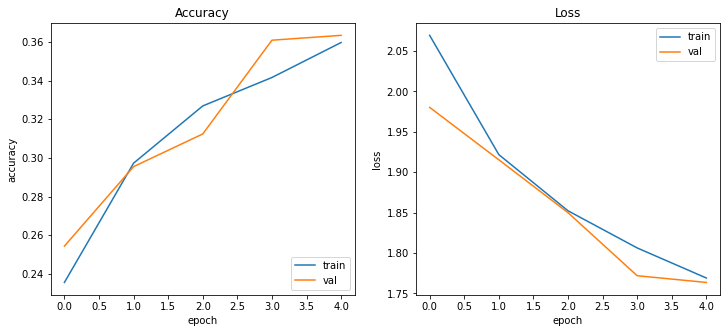

In [36]:
from matplotlib import pyplot
pyplot.figure(figsize=(12,5))
pyplot.subplot(1,2,1)
pyplot.plot(new_model_1_obj.history['accuracy'])
pyplot.plot(new_model_1_obj.history['val_accuracy'])
pyplot.title("Accuracy")
pyplot.ylabel("accuracy")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='lower right')

pyplot.subplot(1,2,2)
pyplot.plot(new_model_1_obj.history['loss'])
pyplot.plot(new_model_1_obj.history['val_loss'])
pyplot.title("Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')
pyplot.show()

* From the above plots we see that training loss decreases gradually till 5th epoch, the validation loss decreases throughout  and has a small gap with the training loss. The plot of learning curves shows a good fit. 
* Model is considered to be overfit if training loss decreases but the validation loss increases, that is, the model performed well on train set but not on validation set. Regularization techniques must be implemented within the model to avoid overfitting.

### 2 - Convolution Neural Network 1

We have built a Convolutional neural network with the following architecture:

* 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
* 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
* Fully connected (Dense) layer with 512 units and a sigmoid activation function
* Fully connected layer with 512 units and a sigmoid activation function
* Output layer with the "Softmax" activation function and 10 neurons (since we have 10 different classes in our dataset)

*Source: Assignment Question*

In [13]:
model2 = Sequential()

#Creating convolutional layers
new_conv1 = layers.Conv2D(64, (3,3),activation='relu', input_shape=(32,32,3))
new_conv2 = layers.Conv2D(64, (3,3),activation='relu')

#Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
flat_layer = layers.Flatten() 

model2.add(new_conv1)
model2.add(new_conv2)
model2.add(flat_layer)
model2.add(layers.Dense(512, activation='sigmoid'))
model2.add(layers.Dense(512, activation='sigmoid'))
model2.add(layers.Dense(10, 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
__________________________________________

In [14]:
#Configuring the model and traning

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start_time = time.time()
new_model_2_obj=model2.fit(train_new_x, train_new_y, batch_size=32, epochs=5, shuffle=True, validation_data=(x_val, y_val))
elapsed_time = time.time() - start_time

Epoch 1/5
313/313 [==============================] - 47s 148ms/step - loss: 2.0475 - accuracy: 0.2408 - val_loss: 1.5243 - val_accuracy: 0.4328
Epoch 2/5
313/313 [==============================] - 48s 153ms/step - loss: 1.4115 - accuracy: 0.4836 - val_loss: 1.4702 - val_accuracy: 0.4807
Epoch 3/5
313/313 [==============================] - 48s 153ms/step - loss: 1.1218 - accuracy: 0.5981 - val_loss: 1.3257 - val_accuracy: 0.5291
Epoch 4/5
313/313 [==============================] - 49s 155ms/step - loss: 0.7986 - accuracy: 0.7205 - val_loss: 1.4239 - val_accuracy: 0.5265
Epoch 5/5
313/313 [==============================] - 48s 154ms/step - loss: 0.4185 - accuracy: 0.8676 - val_loss: 1.5922 - val_accuracy: 0.5297


In [15]:
#Printing the time taken (in seconds) for training the model

print("Time taken for the training (in seconds): {}".format(elapsed_time))

Time taken for the training (in seconds): 240.07879757881165


### 3 - Convolution Neural Network 2

We have built a Convolutional neural network with the following architecture:

* 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
* 2x2 Max pooling layer
* 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
* 2x2 Max pooling layer
* Fully connected layer with 512 units and a sigmoid activation function
* Dropout layer with 0.2 dropout rate
* Fully connected layer with 512 units and a sigmoid activation function
* Dropout layer with 0.2 dropout rate
* Output layer with **Softmax** activation function and **10 neurons** (since we have 10 different classes in our dataset)

*Source: Assignment Question*

In [16]:
model3 = Sequential()

new_conv1 = layers.Conv2D(64, (3,3),activation='relu', input_shape=(32,32,3))
new_conv2 = layers.Conv2D(64, (3,3),activation='relu')

#Flattening is converting the data into a 1-dimensional array for inputting it to the next layer
flat_layer = layers.Flatten()

#Creating Max Pooling Layers
max_pool_1 = layers.MaxPooling2D((2,2))
max_pool_2 = layers.MaxPooling2D((2,2))

# Creating dropout layers
drop_1 = layers.Dropout(0.2) 
drop_2 = layers.Dropout(0.2)

model3.add(new_conv1)
model3.add(max_pool_1)
model3.add(new_conv2)
model3.add(max_pool_2)
model3.add(flat_layer)
model3.add(layers.Dense(512, activation='sigmoid'))
model3.add(drop_1)
model3.add(layers.Dense(512, activation='sigmoid'))
model3.add(drop_2)
model3.add(layers.Dense(10, 'softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [17]:
#Configuring the model and traning

model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start_time = time.time()
new_model_3_obj=model3.fit(train_new_x, train_new_y, batch_size=32, epochs=5, shuffle=True, validation_data=(x_val, y_val))
elapsed_time = time.time() - start_time

Epoch 1/5
313/313 [==============================] - 11s 32ms/step - loss: 2.1725 - accuracy: 0.1917 - val_loss: 1.6042 - val_accuracy: 0.4072
Epoch 2/5
313/313 [==============================] - 9s 30ms/step - loss: 1.6122 - accuracy: 0.4063 - val_loss: 1.4528 - val_accuracy: 0.4717
Epoch 3/5
313/313 [==============================] - 9s 30ms/step - loss: 1.4374 - accuracy: 0.4764 - val_loss: 1.4045 - val_accuracy: 0.4902
Epoch 4/5
313/313 [==============================] - 10s 31ms/step - loss: 1.3132 - accuracy: 0.5268 - val_loss: 1.2536 - val_accuracy: 0.5524
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.1892 - accuracy: 0.5707 - val_loss: 1.2240 - val_accuracy: 0.5659


In [18]:
#Printing the time taken (in seconds) for training the model

print("Time taken for the training (in seconds): {}".format(elapsed_time))

Time taken for the training (in seconds): 48.971471309661865


***

### a) Summary of what was done:
> - CIFAR-10 Dataset has been downloaded using Keras API and preprocessing has been done.
> - Dataset has been split into train, validation sets as mentioned.
> - Sample of images were visualized.
> - Following algorithms were implemented
>    - Multi Layer Perceptron
>    - Convolution Neural Network 1
>    - Convolution Neural Network 2 (with a different architecture)
> - **Proper headings, comments are provided for every part.**
> - Training timings were also calculated and reported.

### b) Report:

><u>Pre-Processing:</u> The pixels are normalised in the range [0,1]. This will make sure each input i.e, each pixel will have same distribution and this also helps in faster convergence during the training.<br>
><u>Description of the output layer used and the loss function:</u>The output layer used for all the networks is a fully connected dense layer consisting of 10 neurons. Since we have 10 different classes(0-9) in our dataset, we are using 10 neurons. 
>When there are more outputs, usually we use either **Softmax** or **Argmax** function before decision is made. 
>* Argmax- The highest value of the outputs will be set to 1 and remaining as 0. The problem with Argmax is that it cannot be used to optimize the weights and biases in the neural network, cannot be used for back propogation as it is not differentiable.
>* Softmax - This function, which gives probabilistic output is very often used for training (softmax is differentiable). It preserves the original ranking of the output and also the output of softmax is a value betwenn 0 and 1. <br>
>*Since, we are using the concept of back propogation in our models, we are using Softmax function in the output layer.
<br>
>*We have two or more categories as labels in the dataset and hence sparse_categorical_crossentropy or CategoricalCrossentropy has to be used. We have used **sparse_categorical_crossentropy** as our loss function as the labels are integers.

#### Modifications made to the model
>- Number of layers
>- Number of neurons per layer in the MLP
<br>
<br>
Training and Validation accuracies are tabulated and results are discussed.

##### - Increasing the number of neurons (512 to 1024)

In [20]:
model4 = Sequential()
model4.add(Flatten(input_shape = train_new_x.shape[1:]))
model4.add(Dense(1024, activation='sigmoid'))
model4.add(Dense(1024, activation='sigmoid'))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
new_model_4_obj=model4.fit(train_new_x,train_new_y, batch_size=32, epochs=5, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 8s 19ms/step - loss: 2.2972 - accuracy: 0.1767 - val_loss: 2.0307 - val_accuracy: 0.2342
Epoch 2/5
313/313 [==============================] - 6s 18ms/step - loss: 1.9532 - accuracy: 0.2935 - val_loss: 1.9269 - val_accuracy: 0.2801
Epoch 3/5
313/313 [==============================] - 6s 18ms/step - loss: 1.8793 - accuracy: 0.3132 - val_loss: 1.8497 - val_accuracy: 0.3128
Epoch 4/5
313/313 [==============================] - 6s 18ms/step - loss: 1.8339 - accuracy: 0.3288 - val_loss: 1.8205 - val_accuracy: 0.3299
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 1.7840 - accuracy: 0.3495 - val_loss: 1.7770 - val_accuracy: 0.3545


##### - Reducing the number of neurons (512 to 256)

In [21]:
model5 = Sequential()
model5.add(Flatten(input_shape = train_new_x.shape[1:]))
model5.add(Dense(256, activation='sigmoid'))
model5.add(Dense(256, activation='sigmoid'))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
new_model_5_obj=model5.fit(train_new_x,train_new_y, batch_size=32, epochs=5, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 2.2128 - accuracy: 0.1684 - val_loss: 1.9620 - val_accuracy: 0.2839
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9331 - accuracy: 0.2858 - val_loss: 1.9043 - val_accuracy: 0.3054
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8853 - accuracy: 0.3137 - val_loss: 1.9002 - val_accuracy: 0.2986
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8438 - accuracy: 0.3246 - val_loss: 1.8266 - val_accuracy: 0.3368
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.7961 - accuracy: 0.3454 - val_loss: 1.8242 - val_accuracy: 0.3361


##### - Increasing the number of layers

In [22]:
model6 = Sequential()
model6.add(Flatten(input_shape = train_new_x.shape[1:]))
model6.add(Dense(1024, activation='sigmoid'))
model6.add(Dense(1024, activation='sigmoid'))
model6.add(Dense(1024, activation='sigmoid'))
model6.add(Dense(10, activation='softmax'))
model6.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
new_model_6_obj=model6.fit(train_new_x,train_new_y, batch_size=32, epochs=5, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 7s 23ms/step - loss: 2.4388 - accuracy: 0.1090 - val_loss: 2.1261 - val_accuracy: 0.1854
Epoch 2/5
313/313 [==============================] - 7s 22ms/step - loss: 2.1243 - accuracy: 0.1757 - val_loss: 2.0938 - val_accuracy: 0.1899
Epoch 3/5
313/313 [==============================] - 7s 23ms/step - loss: 2.0886 - accuracy: 0.1878 - val_loss: 2.0292 - val_accuracy: 0.2294
Epoch 4/5
313/313 [==============================] - 7s 24ms/step - loss: 2.0083 - accuracy: 0.2291 - val_loss: 1.9556 - val_accuracy: 0.2610
Epoch 5/5
313/313 [==============================] - 7s 24ms/step - loss: 1.9529 - accuracy: 0.2537 - val_loss: 1.9464 - val_accuracy: 0.2787


##### - Increasing the number of layers with reduced neurons

In [23]:
model7 = Sequential()
model7.add(Flatten(input_shape = train_new_x.shape[1:]))
model7.add(Dense(128, activation='sigmoid'))
model7.add(Dense(128, activation='sigmoid'))
model7.add(Dense(128, activation='sigmoid'))
model7.add(Dense(10, activation='softmax'))
model7.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
new_model_7_obj=model6.fit(train_new_x,train_new_y, batch_size=32, epochs=5, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 7s 24ms/step - loss: 1.9332 - accuracy: 0.2800 - val_loss: 1.9019 - val_accuracy: 0.2922
Epoch 2/5
313/313 [==============================] - 7s 22ms/step - loss: 1.9057 - accuracy: 0.2922 - val_loss: 1.8957 - val_accuracy: 0.2877
Epoch 3/5
313/313 [==============================] - 7s 22ms/step - loss: 1.8766 - accuracy: 0.3107 - val_loss: 1.9005 - val_accuracy: 0.2962
Epoch 4/5
313/313 [==============================] - 7s 22ms/step - loss: 1.8445 - accuracy: 0.3168 - val_loss: 1.8319 - val_accuracy: 0.3249
Epoch 5/5
313/313 [==============================] - 7s 22ms/step - loss: 1.8209 - accuracy: 0.3329 - val_loss: 1.8264 - val_accuracy: 0.3313


In [25]:
layers_list = [2,2,2,3,3]
neurons_list = [512,1024,256,1024,128]
training_acc = [36.48,34.95, 34.54, 25.37, 33.29]
validation_acc = [36.34, 35.45, 33.61, 27.87, 33.13]
d = {'Layers':layers_list, 'Number of Neurons': neurons_list,'Tranining Accuracy':training_acc,
     'Validation Accuracy': validation_acc}
mlp_plot = pd.DataFrame(d)
mlp_plot

,Layers,Number of Neurons,Tranining Accuracy,Validation Accuracy
0,2,512,36.48,36.34
1,2,1024,34.95,35.45
2,2,256,34.54,33.61
3,3,1024,25.37,27.87
4,3,128,33.29,33.13


<u>Comments on the modifications:</u> <br>
Above is a table which shows various combinations tried and their accuracies. <br>
> - As number of layers increased, accuracy didn't improve but decreased by some percentage.<br>
> - Increase in number of neurons also did not have much impact on the training and validation accuracies.<br>
<br>
> - Usually increasing the number of layers helps in learning the patterns better and thus increasing the training accuracy. The actual impact can be better known if number of epochs are increased, but there is also a possbility of overfit with this.<br>
> - Also training data that is considered is only 20% of the whole train data. Considering the whole dataset for training would surely increase the accuracies.

 #### Performance of the MLP vs CNNs.

In [37]:
train_acc = [36.48, 86.76, 57.07]
val_acc = [36.34, 52.97, 56.59]
models=['MLP', 'CNN1', 'CNN2']
d2 = {'Models':models, 'Tranining Accuracy':train_acc,'Validation Accuracy': val_acc}
mlp_plot_2 = pd.DataFrame(d2)
mlp_plot_2

,Models,Tranining Accuracy,Validation Accuracy
0,MLP,36.48,36.34
1,CNN1,86.76,52.97
2,CNN2,57.07,56.59


>It is clearly evident from the table that the CNNs have performed well compared to MLP on CIFAR-10 dataset. This is because,
>- MLP assigns one neuron to each pixel and a densely connected network will have many weights to be calculated and updated, which increases computation, redundancy. 
>- Spatial correlation of pixels is not identified and maintained in MLPs. 
>- Also MLPs respond differently for an image and it's augmented version(rotated, tilted, zoomed images). And hence MLPs are inefficient for image classification.
<br>
<br>
>- CNNs however work in a different way. They identify and extract features present in the image thorugh their convolution layers and feature maps. 
>- Filters that produce these feature maps look for patterns in the image and thus identify the object even in an augmented version. 
>- CNNs maintain the spatial relationship between pixels. Thus CNN is the go-to algorithm for image processing.
>- Also, computationly better than MLPs as number of weights to be calculated can be reduced with the help of pooling layers in CNN.

#### Training and validation curves for the two CNNs and comments

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

We are using the parameter **loss** to plot the training and validation curves for the two CNNs

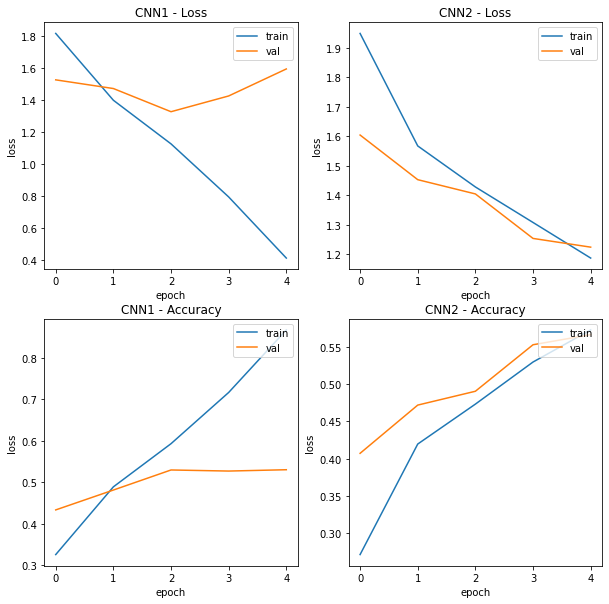

In [46]:
##cnn1
pyplot.figure(figsize=(10,10))
pyplot.subplot(2,2,1)
pyplot.plot(new_model_2_obj.history['loss'])
pyplot.plot(new_model_2_obj.history['val_loss'])
pyplot.title("CNN1 - Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')

# cnn2
pyplot.subplot(2,2,2)
pyplot.plot(new_model_3_obj.history['loss'])
pyplot.plot(new_model_3_obj.history['val_loss'])
pyplot.title("CNN2 - Loss")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')

# cnn1
pyplot.subplot(2,2,3)
pyplot.plot(new_model_2_obj.history['accuracy'])
pyplot.plot(new_model_2_obj.history['val_accuracy'])
pyplot.title("CNN1 - Accuracy")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')

# cnn2
pyplot.subplot(2,2,4)
pyplot.plot(new_model_3_obj.history['accuracy'])
pyplot.plot(new_model_3_obj.history['val_accuracy'])
pyplot.title("CNN2 - Accuracy")
pyplot.ylabel("loss")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'val'], loc='upper right')

pyplot.show()

Loss and accuracy of both train and validation is plotted above for both the CNNs. CNN1 clearly has overfit the training data (train loss reduced with an increase in validation loss which means the model learnt the patterns in train data).
However, CNN2 with droputs and maxpool layers added in its architecture performed well with no overfit.

**Time comparision for each CNN**


* The time taken by Convolution Neural Network 1 model for training is **240 sec** where as the time taken by Convolution Neural Network 2 model for training is **49 sec**.
* The time taken to train CNN2 model is lesser than CNN1. This is due to the fact that CNN2 uses dropout layers.
* In the dropout layer, some number of neurons are randomly ignored or “dropped out". As there are lesser weights associated to update during backpropagation, time taken for training reduced.

**Influence of architectures on results**

* Consider the loss plot of CNN1, training loss gradually reduced but the validation loss increased after few epochs, this clearly shows that the first CNN model is overfit on the training data and when new(validation) data is provided it did not perform well. 
* Architecture of CNN2 has been modified with dropout, maxpool layers added. Now, consider the loss plot of CNN2. Both the training and validation losses reduced with an increase in number of epochs. Dropout is a regularization method and these layers are usually used to prevent overfit.

* Max pool layers are usually added after convolution layers to reduce the resultant featire map dimensions. This would help in reducing the computation time [training time of CNN2 is 64.02 seconds and CNN1 is 305.02 seconds]. Also, these pooling layers summarizes features and thus makes model robust to variations of features in input image.


**Effect of increased epochs on the accuracies:**<br>
Increasing the number of epochs in general causes the model to overfit leading to lose its generalization capacity on new data. Hence optimal number of epochs are to be chosen.
* For MLP, the training logs clearly show that both the training and validation accuracies increased with increase in number of epochs. Also there is no overfit. Hence increasing number of epochs further would help in increasing the accuracies in this case.
* For CNN1, the training logs shows that the model has overfit the data just within 5 epochs, so increasing the number of epochs with this architecture is of no use as the model is already overfit.
* For CNN2, training and validation accuracies increased and there is no overfit as droput layers, maxpool layers were introduced in this architecture. Increasing number of epochs will increase the accuracy for this architecture.

**Our recommendations to improve the network:**

Considering the architecture of CNN2 as it has provided better performance.
* Number of epochs can be increased.
* Only 20% of actual training data is considered. Considering the whole 50,000 images for training will definitely help in getting better accuracies.
* For images with subject not in center, padding has to be introduced so as to preserve the border features.
* Data Augmentation can be introduced. This is a process of generating more images(shifted image, tilted image, rotated image etc) from a single image. This helps in reducing the overfit problem and can help increase the accuracy.
* When data augmentation is considered, the model can be deeper to extract the features, so additional layers can be introduced as well. 

